**Kernel Outlines:**
**1.**Importing Necessary Packages
**2.**Statistical Summary of the Dataset
**3.**Dropping Irrelevant Features
**4.**One Hot Encoding
**5.**Data Visualization
**6.**Detecting Outliers using Tukey Boxplot
**7.**Hand written function for detecting and removing outliers
**8.**Checking Correlation with Heatmap
**9.**Different ML predictive models
Logistic Regression,
Decision Tree,
Random Forest,
Extra Gradient Boosting Tree (XGBoost),
Improve the Predictive Model,
Feature Scaling.

**Importing Required Libraries and Dataset Loading**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
print('Total Number of Null Values by each column :',df.isnull().sum())
print('-'*25)
print('Dataset Shape :',df.shape)
print('-'*25)
print(df.info())

Total Number of Null Values by each column : RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
-------------------------
Dataset Shape : (10000, 14)
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  


**From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.**

In [7]:
# Dropping the above columns
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [8]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We mostly have categorical values and 5 continous variables.

**`Exploratory Data Analysis`**

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

In [10]:
px.pie(data_frame = df,names = 'Exited',title = 'Proportion of customer churned and retained',hole=0.5)

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

<Axes: xlabel='IsActiveMember', ylabel='count'>

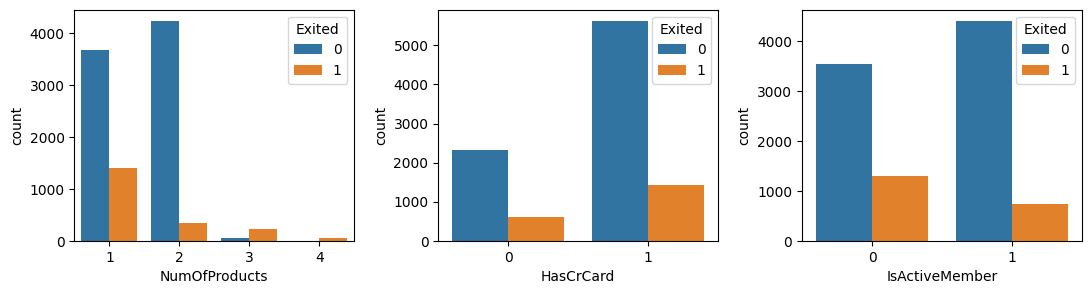

In [11]:
_, ax = plt.subplots(1, 3, figsize=(13, 3))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

Customer with 3 or 4 products are higher chances to Churn

<Axes: xlabel='Gender', ylabel='count'>

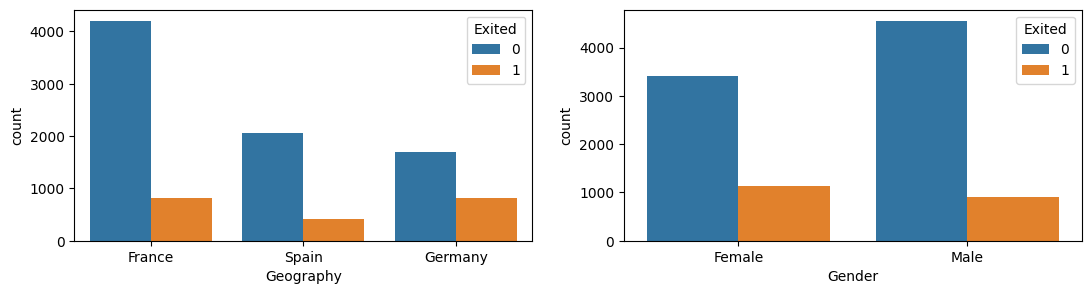

In [12]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(1, 2, figsize=(13, 3))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[1])


We note the following:



*  Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
*   The proportion of female customers churning is also greater than that of male customers.


*  Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
*   Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.




<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

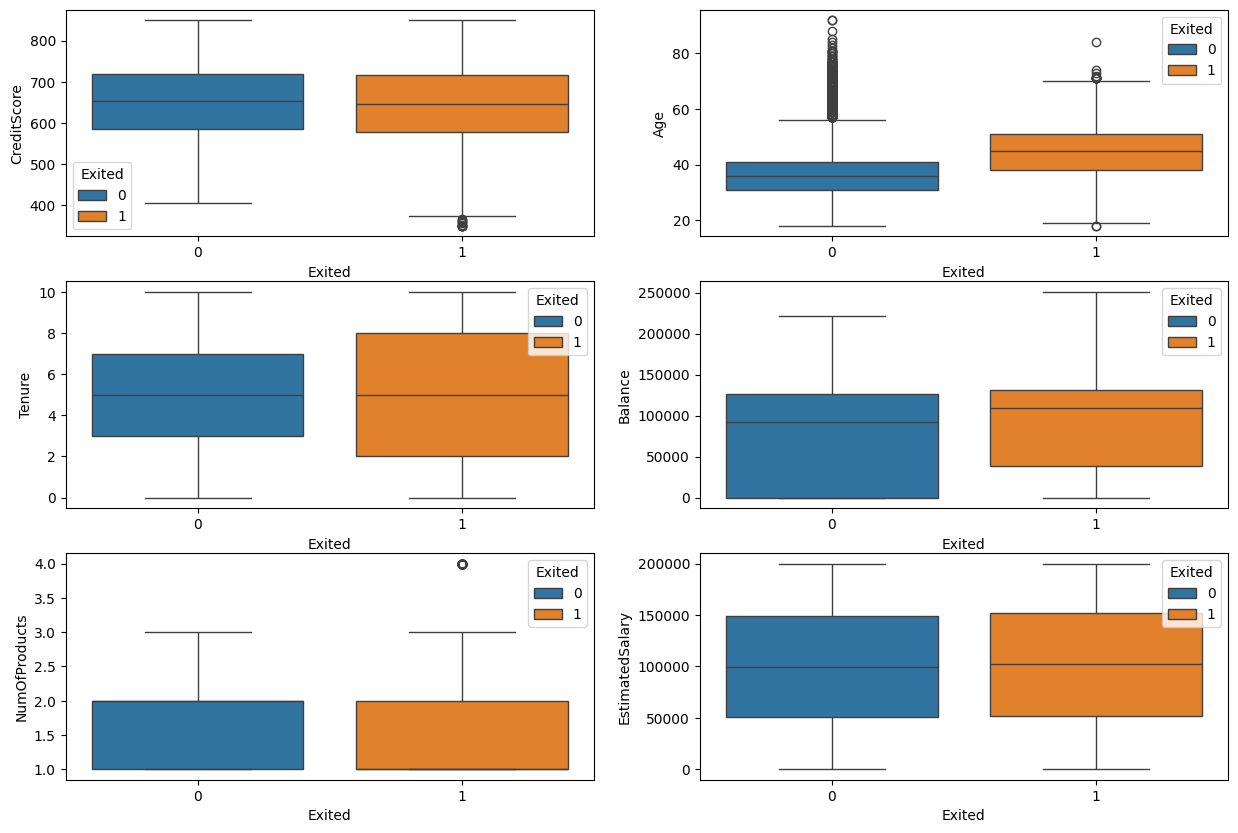

In [13]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(15,10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

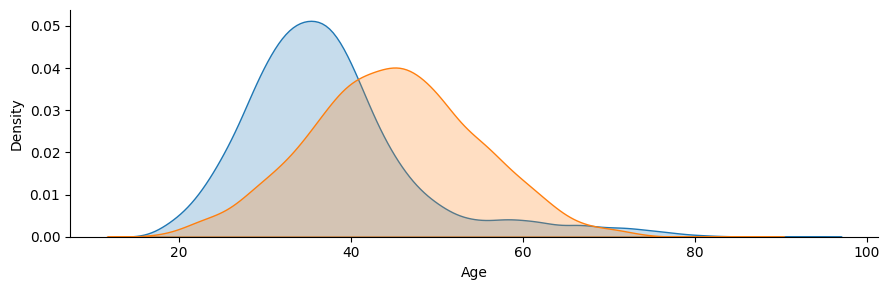

In [14]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
plt.show()

<Axes: xlabel='Age', ylabel='CreditScore'>

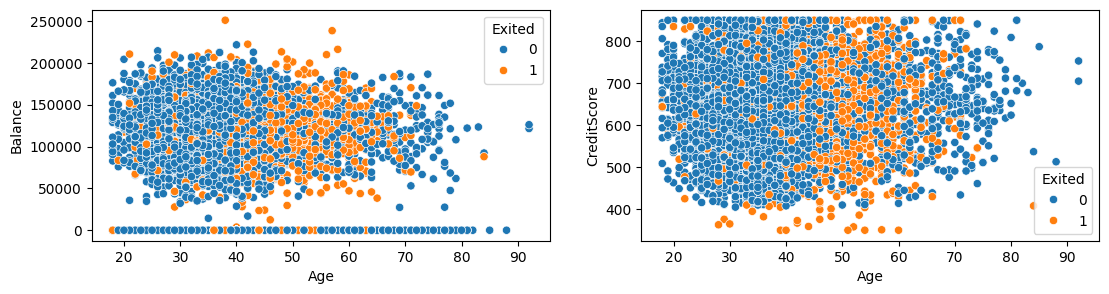

In [15]:
_, ax =  plt.subplots(1, 2, figsize=(13, 3))
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited",  data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited",  data = df, ax=ax[1])

We note the following:



*   There is no significant difference in the credit score distribution between retained and churned customers.

*  The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

*   With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

*  Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.


*  Neither the product nor the salary has a significant effect on the likelihood to churn.

<Axes: >

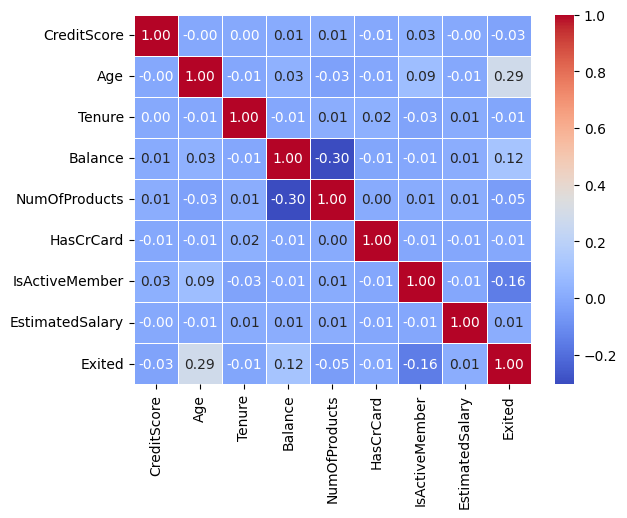

In [16]:
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

**Prediction with ML models**

In [17]:
df.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0

In [18]:
df_with_dummies = pd.get_dummies(data=df, columns=['Geography', 'Gender'], drop_first=True, dtype='int')

# replace_col = ['Geography_Germany','Geography_Spain','Gender_Male']

# df_with_dummies[replace_col] = df_with_dummies[replace_col].replace(0,-1)
df_with_dummies

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1                  1        112542.58       0                  0   
2                  0        113931.57       1                  0   
3                  0         93826.63       0                  0   
4                  1         79084.10       0                  0   
...              ...              ...     ...                ...   
9995               0         96270.64       0                  0   
9996               1        101699.77       0                  0   
9997               1         42085.58       1                  0   
9998               0         92888.52       1                  1   
9999               0         38190.78       0                  0   

      Geography_Spain  Gender_Male  
0                   0            0  
1                   1            0  
2                   0            0  
3                   0            0  
4                   1            0  
...               ...          ...  
9995                0            1  
9996                0            1  
9997                0            0  
9998                0            1  
9999                0            0  

[10000 rows x 12 columns]

In [19]:
X = df_with_dummies.drop("Exited", axis=1)
y = df_with_dummies["Exited"]

In [20]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data (calculate mean and standard deviation)
X_train[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])

X_test[continuous_vars] = scaler.transform(X_test[continuous_vars])

In [23]:
X_train

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7389     0.169582 -0.464608  0.006661 -1.215717       0.809503          1   
9275    -2.304559  0.301026 -1.377440 -0.006312      -0.921591          1   
2995    -1.191196 -0.943129 -1.031415  0.579935      -0.921591          1   
5316     0.035566  0.109617  0.006661  0.473128      -0.921591          1   
356      2.056114  1.736588  1.044737  0.810193       0.809503          1   
...           ...       ...       ...       ...            ...        ...   
9225    -0.582970 -0.656016 -0.339364  0.703104       0.809503          1   
4859     1.478815 -1.613058 -0.339364  0.613060      -0.921591          1   
3264     0.901515 -0.368904  0.006661  1.361474       0.809503          1   
9845    -0.624205 -0.081791  1.390762 -1.215717       0.809503          1   
2732    -0.284011  0.875251 -1.377440  0.511364      -0.921591          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7389               0         1.106432                  0                1   
9275               1        -0.748664                  1                0   
2995               0         1.485335                  0                0   
5316               0         1.276528                  0                1   
356                1         0.558378                  0                1   
...              ...              ...                ...              ...   
9225               1         1.091330                  1                0   
4859               1         0.131760                  0                1   
3264               0         1.412320                  0                0   
9845               1         0.844321                  0                1   
2732               0         0.324725                  1                0   

      Gender_Male  
7389            0  
9275            1  
2995            0  
5316            1  
356             0  
...           ...  
9225            0  
4859            0  
3264            1  
9845            0  
2732            0  

[8000 rows x 11 columns]

In [45]:
# Support functions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix,average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

**RandomForestClassifier**

In [25]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
print(f1_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1712
           1       0.53      0.75      0.62       288

    accuracy                           0.87      2000
   macro avg       0.74      0.82      0.77      2000
weighted avg       0.89      0.87      0.88      2000

0.6204906204906205


**Logistic Regression**

In [26]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
print(f1_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1835
           1       0.24      0.58      0.34       165

    accuracy                           0.81      2000
   macro avg       0.60      0.71      0.61      2000
weighted avg       0.90      0.81      0.84      2000

0.3368421052631579


**Decision Tree Classifier**

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
print(f1_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1550
           1       0.60      0.54      0.56       450

    accuracy                           0.81      2000
   macro avg       0.73      0.71      0.72      2000
weighted avg       0.81      0.81      0.81      2000

0.5637426900584797


**XGBClassifier**

In [28]:
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
print(f1_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1665
           1       0.54      0.66      0.59       335

    accuracy                           0.85      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.86      0.85      0.86      2000

0.5945945945945946


**RandomForrestClassifier + hyperParamerTurning**

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300,400,500],

}

In [30]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                            cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'n_estimators': 200}


In [32]:
clf  = RandomForestClassifier(random_state = 10, n_estimators=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))
print(f1_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1716
           1       0.53      0.75      0.62       284

    accuracy                           0.87      2000
   macro avg       0.74      0.82      0.77      2000
weighted avg       0.89      0.87      0.88      2000

0.6182873730043541


**Imbalanced Dataset**

<Axes: xlabel='Exited', ylabel='count'>

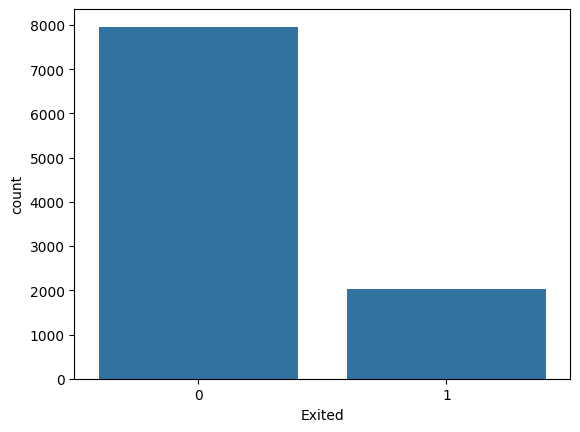

In [33]:
sns.countplot(x = "Exited", data = df)

**SMOTE + RandomForrestClassifier + HyperParameterTuning**

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)

In [36]:
y_res.value_counts()

Exited
0    6368
1    6368
Name: count, dtype: int64

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
}


In [38]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                            cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters: {'n_estimators': 300}


In [39]:
clf  = RandomForestClassifier(random_state = 10, n_estimators=300)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(f1_score(pred, y_test))

0.8875786163522011


In [40]:
print(precision_score(pred, y_test))

0.8967434471803019


<Axes: >

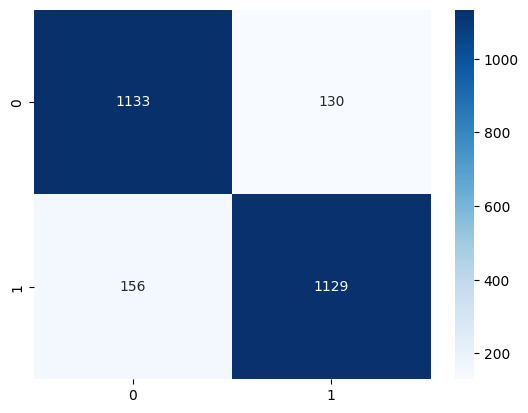

In [44]:
sns.heatmap(confusion_matrix(pred,y_test),annot = True,fmt = 'g',cmap = 'Blues')

In [47]:
print("Area under precision (AUC) Recall:", average_precision_score(y_test, pred))

Area under precision (AUC) Recall: 0.8388985030010557
